In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Salaries_Decision Tree.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,amazon,sales executive,masters,0
7,amazon,computer programmer,bachelors,0
8,amazon,business manager,bachelors,0
9,amazon,business manager,masters,1


In [3]:
df["company"].unique()

array(['google', 'amazon', 'facebook'], dtype=object)

In [4]:
df['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [5]:
x=df.iloc[:,:3]
x

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,amazon,sales executive,masters
7,amazon,computer programmer,bachelors
8,amazon,business manager,bachelors
9,amazon,business manager,masters


In [8]:
y=df.iloc[:,3:]
y

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [10]:
# to convert the categorical data into integers
from sklearn.preprocessing import LabelEncoder
l_company=LabelEncoder()
l_job=LabelEncoder()
l_degree=LabelEncoder()

In [11]:
x["company"]=l_company.fit_transform(x["company"])
x["job"]=l_job.fit_transform(x["job"])
x["degree"]=l_degree.fit_transform(x["degree"])

In [12]:
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [15]:
xtrain

,company,job,degree
5,2,1,1
15,1,1,1
4,2,1,0
0,2,2,0
8,0,0,0
14,1,1,0
1,2,2,1
3,2,0,1
13,1,0,1
11,1,2,1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model=DecisionTreeClassifier()

In [21]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [22]:
ans=model.predict(xtest)
ans

array([1, 1, 1, 0], dtype=int64)

In [23]:
model.score(xtest,ytest)

0.5

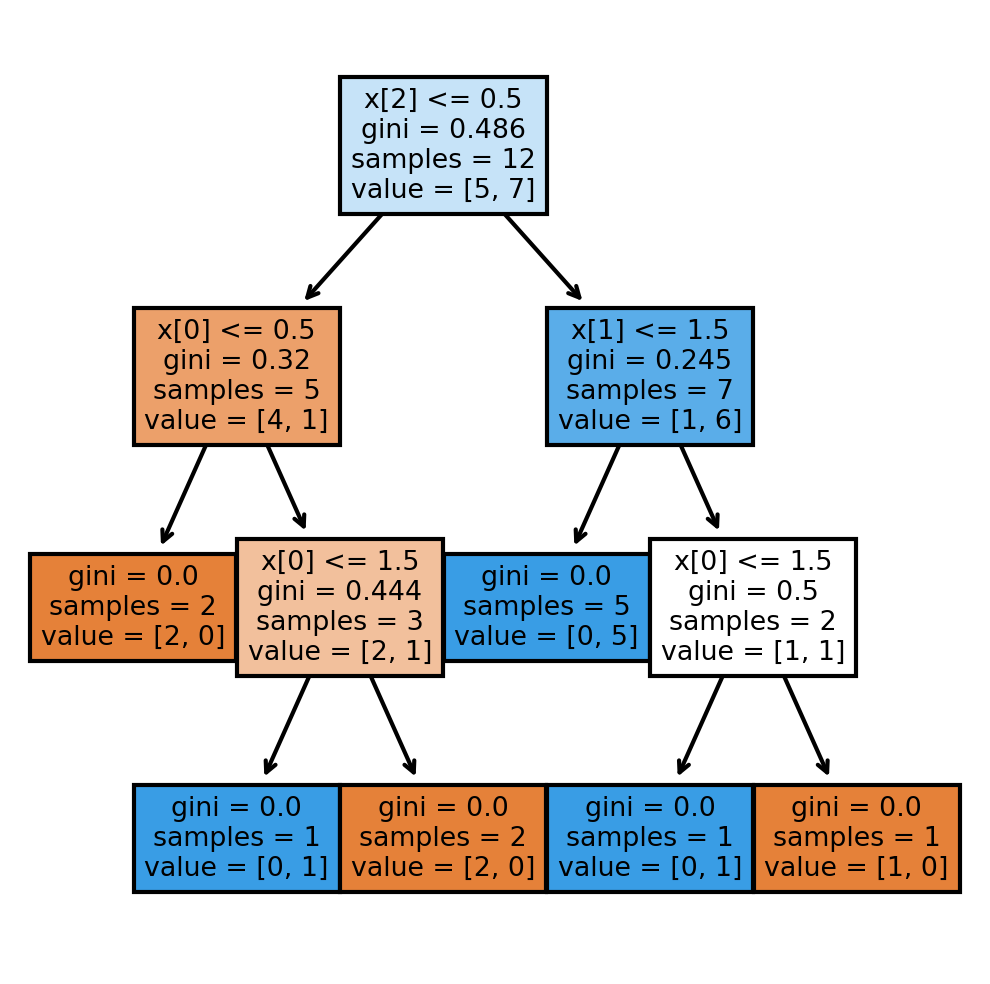

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,filled = True);
